<img src = "Entrega esperada.png" width = "400">

<img src="Objetivo.png" width="500">

Questão 1:

<img src="Questão 1.png" width="500">

<img src= "Fluxograma 1.png" width ="300">

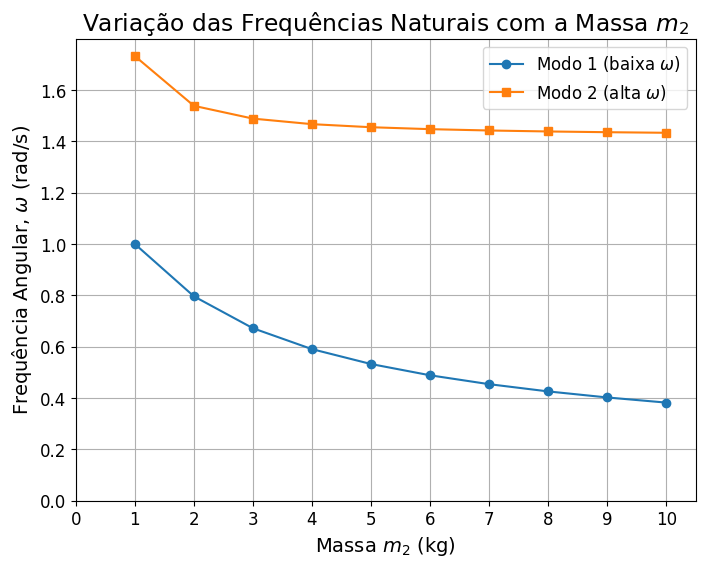

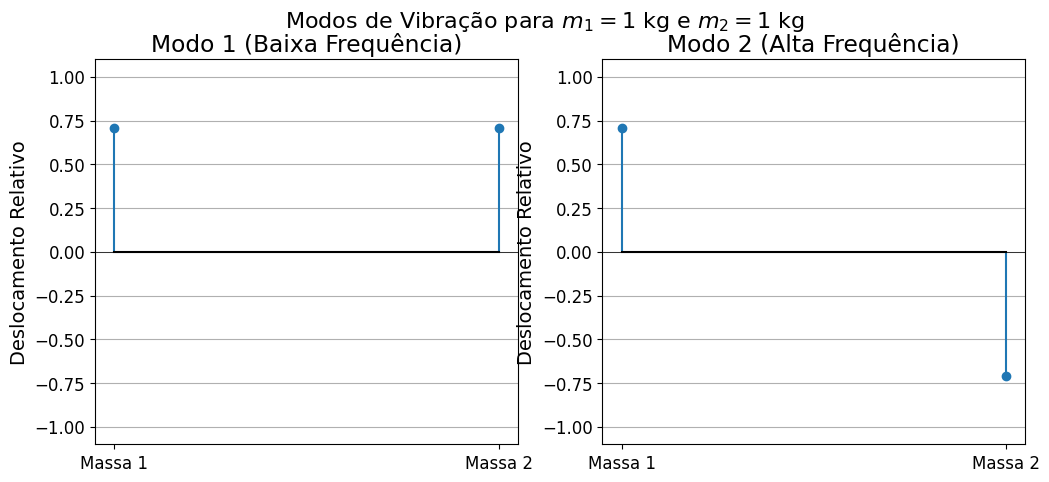

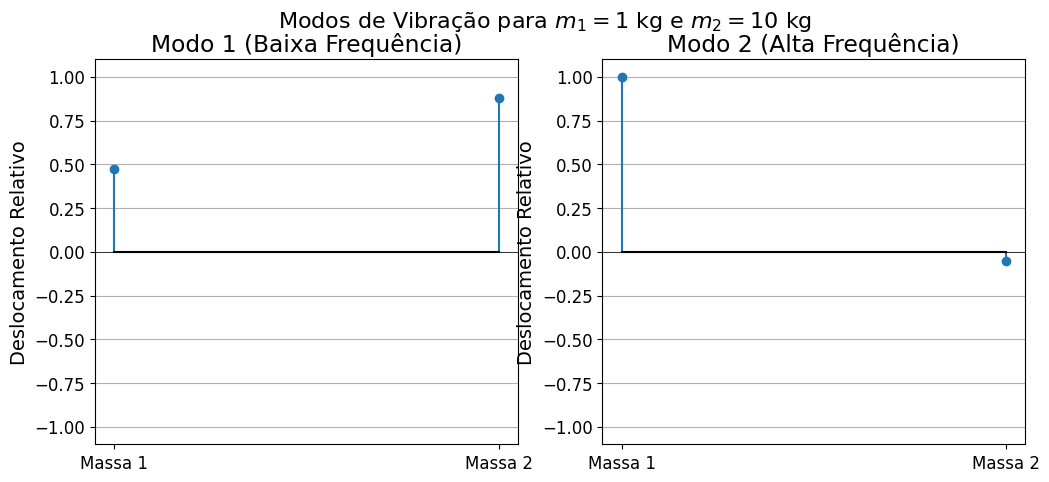

In [59]:
#importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 6)
})

#definição de constantes e massas
m1 = 1.0
k1 = k2 = k3 = 1.0

def calcular_frequencia_e_modos_numpy(m1, m2):
    #criação da matriz de massas
    M = np.array([[m1, 0], [0, m2]])
    #criação da matriz de rigidez
    K = np.array([[k1 + k2,  -k2], [-k2,    k2 + k3]])
    
    M_inv = np.linalg.inv(M)
    #matriz solução 
    A = M_inv @ K
    
    #encontrando os autovalores e autovetores
    autovalores_quadrado, autovetores = np.linalg.eig(A)
    
    frequencias_naturais = np.sqrt(np.real(autovalores_quadrado))
    
    return frequencias_naturais, np.real(autovetores)

#armazenando frequências, massas e modos
lista_massas = []
freq_modo_1 = [] 
freq_modo_2 = []
modos_armazenados = {}

#variando m2
for m2_valor in range(1, 11):
    frequencias, modos = calcular_frequencia_e_modos_numpy(m1, m2_valor)
    
    # O eig do numpy não garante a ordem, então ordenamos manualmente
    # para que os gráficos de frequência não cruzem de forma estranha.
    indices_ordenados = np.argsort(frequencias)
    freqs_ordenadas = frequencias[indices_ordenados]
    modos_ordenados = modos[:, indices_ordenados]
    
    lista_massas.append(m2_valor)
    freq_modo_1.append(freqs_ordenadas[0]) # Frequência mais baixa
    freq_modo_2.append(freqs_ordenadas[1]) # Frequência mais alta
    modos_armazenados[m2_valor] = modos_ordenados


# Geração do Gráfico 1: Frequências vs. Massa m2
plt.figure()
plt.plot(lista_massas, freq_modo_1, 'o-', label=r'Modo 1 (baixa $\omega$)')
plt.plot(lista_massas, freq_modo_2, 's-', label=r'Modo 2 (alta $\omega$)')
plt.title(r"Variação das Frequências Naturais com a Massa $m_2$")
plt.xlabel(r"Massa $m_2$ (kg)")
plt.ylabel(r"Frequência Angular, $\omega$ (rad/s)")
plt.grid(True)
plt.xticks(np.arange(0, 11, step=1))
plt.xlim(0, 10.5)
plt.ylim(bottom=0)
plt.legend()
plt.show()


# Geração do Gráfico 2: Modos de Vibração
def plotar_modos_numpy(m2_valor, modos_dict):
    modos = modos_dict[m2_valor]
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Modos de Vibração para $m_1=1$ kg e $m_2={m2_valor}$ kg", fontsize=16)
    nomes = [r'Modo 1 (Baixa Frequência)', r'Modo 2 (Alta Frequência)']
    for i, ax in enumerate(axes):
        ax.stem([1, 2], modos[:, i], basefmt="k-")
        ax.set_title(nomes[i])
        ax.set_xticks([1, 2]); ax.set_xticklabels(['Massa 1', 'Massa 2'])
        ax.set_ylabel("Deslocamento Relativo")
        ax.axhline(0, color='black', linewidth=0.5)
        ax.set_ylim(-1.1, 1.1)
        ax.grid(True, axis='y')
    plt.show()

# Plotar os modos para dois casos representativos
plotar_modos_numpy(1, modos_armazenados)
plotar_modos_numpy(10, modos_armazenados)

A análise dos resultados para a variação da massa $m_2$ de 1 kg a 10 kg permite uma clara interpretação dos efeitos da inércia no sistema. Observamos, a partir do primeiro gráfico, que ambas as frequências naturais diminuem com o aumento de $m_2$. Este resultado é fisicamente esperado, pois sistemas com maior massa possuem maior inércia e, consequentemente, oscilam com menor frequência.

As duas frequências, no entanto, não diminuem uniformemente.

1.  **Análise das Frequências**

    A frequência do **Modo 1 (curva de baixa frequência)** decai acentuadamente, tendendo a zero. Este modo corresponde ao movimento em fase das massas. Com o aumento de $m_2$, a inércia efetiva deste modo cresce substancialmente, o que reduz de forma drástica sua frequência de oscilação.

    Por outro lado, a frequência do **Modo 2 (curva de alta frequência)**, embora também diminua, converge para um valor constante, formando um platô. Este modo é o antissimétrico, no qual as massas se movem em oposição. A estabilização ocorre porque, para valores elevados de $m_2$, esta massa passa a funcionar como um ponto de fixação quase-rígido (uma "parede") para a massa $m_1$. O sistema passa a se comportar como um oscilador simples, cuja frequência teórica é $\omega = \sqrt{(k_1+k_2)/m_1} = \sqrt{(1+1)/1} = \sqrt{2} \approx 1.414$ rad/s, valor que corresponde precisamente ao platô do gráfico.

2.  **Análise dos Modos de Vibração**

    A análise dos modos de vibração (gráficos de haste) ilustra visualmente esta interpretação.
    * **Para $m_2 = 1$ kg**, caso de massas iguais, os modos são claramente definidos como simétrico e antissimétrico puro.
    * **Para $m_2 = 10$ kg**, a forma das vibrações é alterada. Em ambos os modos, a amplitude de deslocamento de $m_1$ é significativamente maior que a de $m_2$. Isto demonstra que a oscilação se concentra na massa mais leve, enquanto $m_2$ atua predominantemente como uma âncora inercial.

**Conclusão**

Em conclusão, o aumento da massa $m_2$ não apenas reduz as frequências naturais do sistema, mas também modifica o caráter dos modos de vibração, transferindo a maior parte da amplitude do movimento para a massa mais leve e alterando a dinâmica de interação entre os componentes do sistema.

Questão 2:

<img src = "Questão 2.png" width="500">

<img src="Fluxograma 2.png" width = "300">

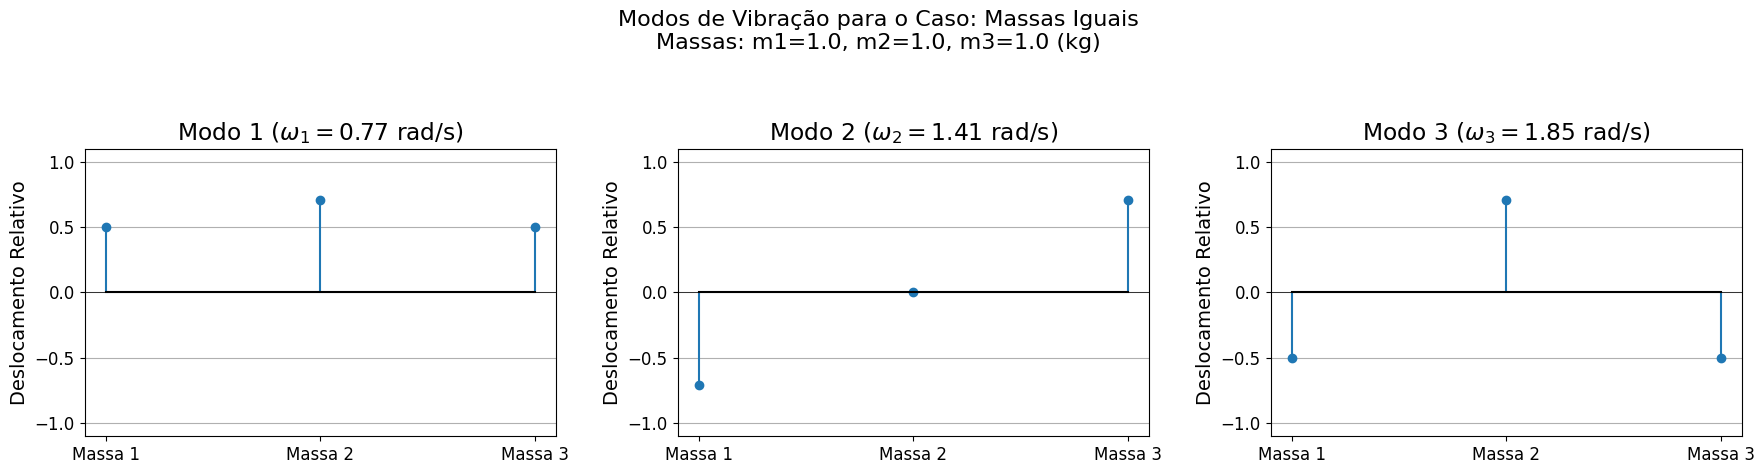

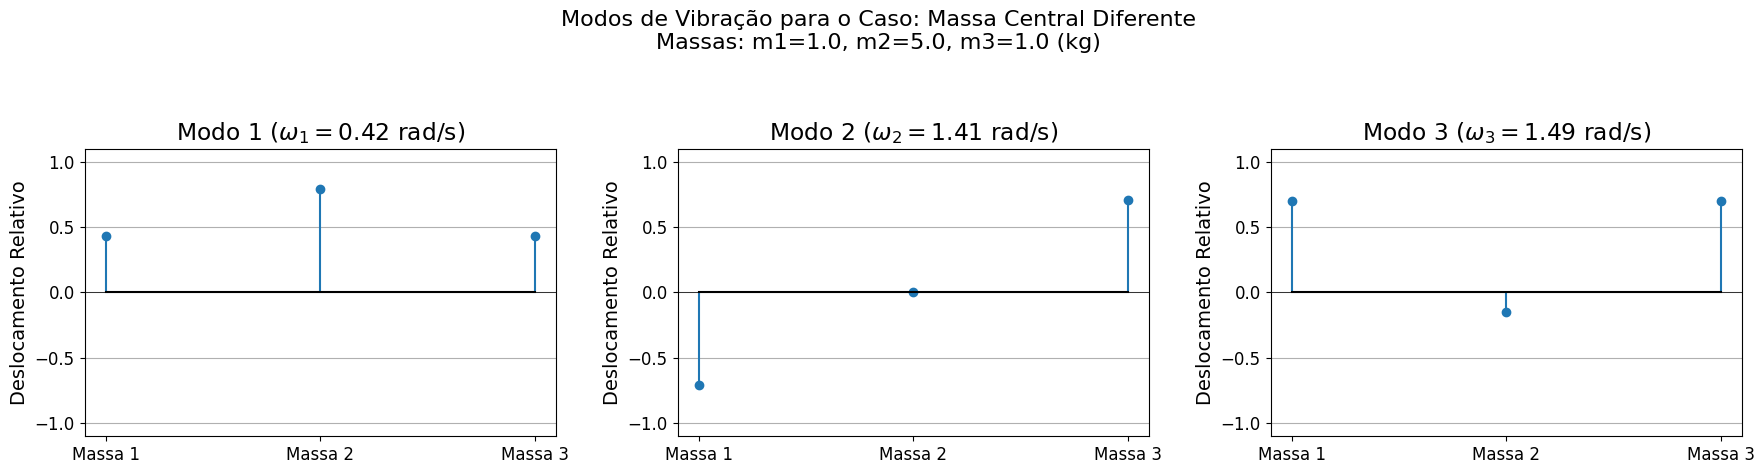

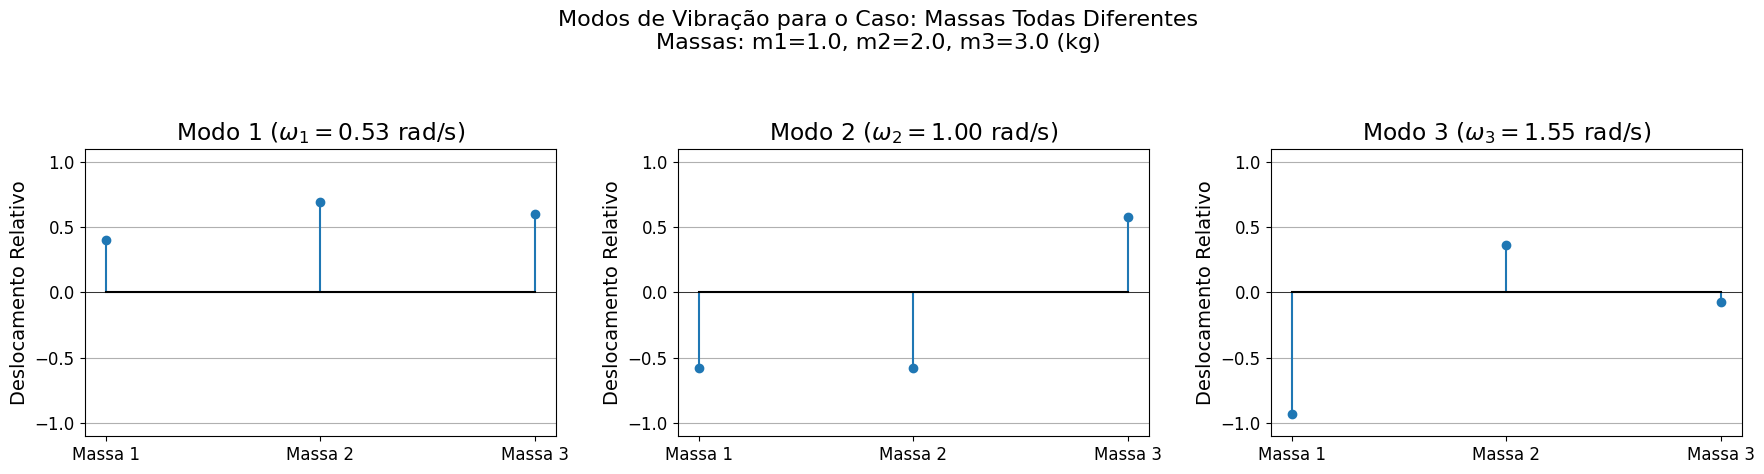

In [58]:
#importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 5)
})

#definição de constantes de mola
k1 = k2 = k3 = k4 = 1.0

def calcular_propriedades_3massas(m1, m2, m3):
    #criação da matriz de massas 3x3
    M = np.array([[m1, 0,  0],
                  [0,  m2, 0],
                  [0,  0,  m3]])

    #criação da matriz de rigidez 3x3
    K = np.array([[k1 + k2,   -k2,       0  ],
                  [-k2,   k2 + k3,   -k3  ],
                  [0,       -k3,   k3 + k4]])
    
    #matriz solução 
    M_inv = np.linalg.inv(M)
    A = M_inv @ K
    
    #encontrando os autovalores e autovetores
    autovalores_quadrado, autovetores = np.linalg.eig(A)
    
    frequencias_naturais = np.sqrt(np.real(autovalores_quadrado))
    
    # Ordenar resultados pela frequência (do menor para o maior)
    indices_ordenados = np.argsort(frequencias_naturais)
    freqs_ordenadas = frequencias_naturais[indices_ordenados]
    modos_ordenados = np.real(autovetores[:, indices_ordenados])
    
    return freqs_ordenadas, modos_ordenados

def plotar_modos_3massas(massas, freqs, modos, caso_titulo):
    """
    Plota os 3 modos de vibração para um sistema de 3 massas.
    """
    m1, m2, m3 = massas
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Modos de Vibração para o Caso: {caso_titulo}\nMassas: m1={m1}, m2={m2}, m3={m3} (kg)", fontsize=16)
    
    # CORREÇÃO: Usando rf'...' (raw f-string) para evitar SyntaxWarning
    nomes_modos = [rf'Modo 1 ($\omega_1={freqs[0]:.2f}$ rad/s)',
                   rf'Modo 2 ($\omega_2={freqs[1]:.2f}$ rad/s)',
                   rf'Modo 3 ($\omega_3={freqs[2]:.2f}$ rad/s)']
                   
    for i, ax in enumerate(axes):
        modo_atual = modos[:, i]
        ax.stem([1, 2, 3], modo_atual, basefmt="k-")
        ax.set_title(nomes_modos[i])
        ax.set_xticks([1, 2, 3]); ax.set_xticklabels(['Massa 1', 'Massa 2', 'Massa 3'])
        ax.set_ylabel("Deslocamento Relativo")
        ax.axhline(0, color='black', linewidth=0.5)
        ax.set_ylim(-1.1, 1.1)
        ax.grid(True, axis='y')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    # CORREÇÃO: Linha para salvar em PDF foi removida.
    plt.show()

# --- Análise dos Casos do Exercício 2 ---

# Caso 1: Todas as massas iguais
massas_caso1 = (1.0, 1.0, 1.0)
freqs1, modos1 = calcular_propriedades_3massas(*massas_caso1)
plotar_modos_3massas(massas_caso1, freqs1, modos1, "Massas Iguais")

# Caso 2: Apenas uma diferente (massa central pesada)
massas_caso2 = (1.0, 5.0, 1.0)
freqs2, modos2 = calcular_propriedades_3massas(*massas_caso2)
plotar_modos_3massas(massas_caso2, freqs2, modos2, "Massa Central Diferente")

# Caso 3: Todas as massas diferentes
massas_caso3 = (1.0, 2.0, 3.0)
freqs3, modos3 = calcular_propriedades_3massas(*massas_caso3)
plotar_modos_3massas(massas_caso3, freqs3, modos3, "Massas Todas Diferentes")



Com base nos gráficos gerados para os três casos de distribuição de massa no sistema de três massas, observamos como a simetria da massa influencia diretamente as frequências e os padrões de vibração.

**Caso 1: Massas Iguais (m1=1, m2=1, m3=1)**

Neste sistema perfeitamente simétrico, as frequências são distintas e os modos de vibração apresentam padrões claros e previsíveis:
* **Modo 1 (baixa frequência):** As três massas oscilam em fase, com a massa central apresentando a maior amplitude. É um modo de "respiração" do sistema inteiro.
* **Modo 2 (frequência intermediária):** A massa central permanece completamente estacionária (um "nó" de vibração), enquanto as massas externas oscilam em oposição de fase. Este padrão é uma consequência direta da simetria do sistema.
* **Modo 3 (alta frequência):** As duas massas externas se movem em fase, mas em oposição à massa central, que oscila com grande amplitude.

**Caso 2: Massa Central Diferente (m1=1, m2=5, m3=1)**

Ao tornar a massa central cinco vezes mais pesada, quebramos parcialmente a simetria, com os seguintes efeitos:
* **Frequências:** As frequências dos modos que envolvem o movimento da massa central (Modo 1 e Modo 3) diminuem significativamente devido à sua maior inércia. A frequência do Modo 2, onde $m_2$ mal se movia, sofre menor alteração.
* **Modos de Vibração:** O padrão do Modo 2 é o que mais muda: a massa central $m_2$ agora se move um pouco, o que significa que o "nó" perfeito deixou de existir. Nos outros modos, a amplitude relativa de $m_2$ é visivelmente menor em comparação com as massas leves, mostrando que ela resiste mais ao movimento.

**Caso 3: Massas Todas Diferentes (m1=1, m2=2, m3=3)**

Com a simetria completamente removida, os modos de vibração perdem seus padrões simples:
* **Frequências:** Os valores são deslocados de forma complexa, refletindo a distribuição desigual de inércia.
* **Modos de Vibração:** Nenhum dos modos é puramente simétrico ou antissimétrico. O conceito de "nó" no Modo 2 desaparece completamente, e a massa de maior deslocamento varia em cada modo, dependendo da complexa interação entre as massas e molas. Os padrões se tornam únicos para esta configuração específica.

**Conclusão**

A distribuição de massa é um fator determinante no comportamento dinâmico de um sistema. Sistemas simétricos produzem modos de vibração elegantes e previsíveis, incluindo nós estacionários. A quebra dessa simetria, seja parcial ou total, resulta em padrões de modo mais complexos e altera as frequências naturais de maneira não trivial, concentrando a resistência ao movimento nas massas mais pesadas.

Questão 3:

<img src ="Questão 3.png" width="500">

<img src="Fluxograma 3.png" width= "300">

In [ ]:
#importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 6)
})

#definição das massas (agora são fixas)
m1 = m2 = m3 = 1.0
MASSAS_FIXAS = (m1, m2, m3)

def calcular_propriedades_k(massas, ks):
    """
    Calcula frequências e modos para um sistema de 3 massas com dadas constantes de mola.
    ks: uma tupla/lista com (k1, k2, k3, k4)
    """
    m1, m2, m3 = massas
    k1, k2, k3, k4 = ks
    
    #criação da matriz de massas 3x3
    M = np.array([[m1, 0,  0],
                  [0,  m2, 0],
                  [0,  0,  m3]])

    #criação da matriz de rigidez 3x3
    K = np.array([[k1 + k2,   -k2,       0  ],
                  [-k2,   k2 + k3,   -k3  ],
                  [0,       -k3,   k3 + k4]])
    
    #matriz solução 
    M_inv = np.linalg.inv(M)
    A = M_inv @ K
    
    #encontrando os autovalores e autovetores
    autovalores_quadrado, autovetores = np.linalg.eig(A)
    
    frequencias_naturais = np.sqrt(np.real(autovalores_quadrado))
    
    # Ordenar resultados pela frequência
    indices_ordenados = np.argsort(frequencias_naturais)
    freqs_ordenadas = frequencias_naturais[indices_ordenados]
    modos_ordenados = np.real(autovetores[:, indices_ordenados])
    
    return freqs_ordenadas, modos_ordenados

def plotar_freq_vs_k(k_variado, freqs, titulo, xlabel):
    """Plota o gráfico de frequências vs. a rigidez variável."""
    plt.figure()
    # Transpor a matriz de frequências para plotar cada modo
    freqs_np = np.array(freqs)
    plt.plot(k_variado, freqs_np[:, 0], 'o-', label=r'Modo 1 ($\omega_1$)')
    plt.plot(k_variado, freqs_np[:, 1], 's-', label=r'Modo 2 ($\omega_2$)')
    plt.plot(k_variado, freqs_np[:, 2], '^-', label=r'Modo 3 ($\omega_3$)')
    
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(r"Frequência Angular, $\omega$ (rad/s)")
    plt.grid(True)
    plt.legend()
    plt.ylim(bottom=0)
    plt.show()

def plotar_modos_k(ks, titulo_caso):
    """Plota os 3 modos de vibração para uma dada configuração de molas."""
    freqs, modos = calcular_propriedades_k(MASSAS_FIXAS, ks)
    k1, k2, k3, k4 = ks
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Modos de Vibração para o Caso: {titulo_caso}\nConstantes k=({k1},{k2},{k3},{k4}) N/m", fontsize=16)
    
    nomes_modos = [rf'Modo 1 ($\omega_1={freqs[0]:.2f}$)',
                   rf'Modo 2 ($\omega_2={freqs[1]:.2f}$)',
                   rf'Modo 3 ($\omega_3={freqs[2]:.2f}$)']
                   
    for i, ax in enumerate(axes):
        ax.stem([1, 2, 3], modos[:, i], basefmt="k-")
        ax.set_title(nomes_modos[i])
        ax.set_xticks([1, 2, 3]); ax.set_xticklabels(['Massa 1', 'Massa 2', 'Massa 3'])
        ax.set_ylabel("Deslocamento Relativo"); ax.set_ylim(-1.1, 1.1)
        ax.grid(True, axis='y'); ax.axhline(0, color='black', linewidth=0.5)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

# --- Cenário 1: Variando Molas Internas (k2 e k3) ---
k_fixo_ext = 1.0
k_variavel = np.linspace(0.1, 5.0, 50)
frequencias_cenario1 = []

for k_int in k_variavel:
    constantes = (k_fixo_ext, k_int, k_int, k_fixo_ext)
    freqs, _ = calcular_propriedades_k(MASSAS_FIXAS, constantes)
    frequencias_cenario1.append(freqs)

plotar_freq_vs_k(k_variavel, frequencias_cenario1, 
                 "Frequências vs. Rigidez das Molas Internas ($k_2, k_3$)",
                 r"Rigidez $k_{interna}$ (N/m)")

plotar_modos_k((1.0, 0.1, 0.1, 1.0), "Molas Internas Moles")
plotar_modos_k((1.0, 5.0, 5.0, 1.0), "Molas Internas Rígidas")


# --- Cenário 2: Variando Molas Externas (k1 e k4) ---
k_fixo_int = 1.0
k_variavel = np.linspace(0.1, 5.0, 50)
frequencias_cenario2 = []

for k_ext in k_variavel:
    constantes = (k_ext, k_fixo_int, k_fixo_int, k_ext)
    freqs, _ = calcular_propriedades_k(MASSAS_FIXAS, constantes)
    frequencias_cenario2.append(freqs)

plotar_freq_vs_k(k_variavel, frequencias_cenario2, 
                 "Frequências vs. Rigidez das Molas Externas ($k_1, k_4$)",
                 r"Rigidez $k_{externa}$ (N/m)")

plotar_modos_k((0.1, 1.0, 1.0, 0.1), "Molas Externas Moles")
plotar_modos_k((5.0, 1.0, 1.0, 5.0), "Molas Externas Rígidas")



Esta análise investiga como a rigidez das molas, tanto internas quanto externas, afeta as frequências naturais e os modos de vibração de um sistema de três massas iguais.

**Cenário 1: Variação das Molas Internas ($k_2, k_3$)**

Ao aumentar a rigidez das molas que conectam as massas entre si, observamos no primeiro gráfico que todas as três frequências naturais aumentam. Isso é esperado, pois um sistema mais rígido armazena mais energia potencial para um dado deslocamento, resultando em oscilações mais rápidas ($\omega \propto \sqrt{k}$).

A sensibilidade de cada modo a essa variação é diferente:
* As frequências dos **Modos 2 e 3** são as que mais aumentam. Isso ocorre porque esses modos envolvem compressão e estiramento significativos das molas internas, devido ao movimento de oposição entre massas adjacentes.
* A frequência do **Modo 1**, onde as três massas se movem em fase (como um bloco), é a menos afetada. Neste padrão, as molas internas são pouco deformadas, então sua rigidez tem um impacto menor na frequência.

**Cenário 2: Variação das Molas Externas ($k_1, k_4$)**

Aumentando a rigidez das molas que prendem o sistema às paredes, novamente observamos que todas as frequências aumentam, pois a rigidez total do sistema cresce. Contudo, a influência em cada modo é distinta do cenário anterior:
* A frequência do **Modo 1** é agora a mais sensível. Este modo envolve o deslocamento do sistema como um todo contra as paredes, então a rigidez dessas molas externas é o fator dominante.
* A frequência do **Modo 2**, onde a massa central fica parada e as externas se opõem, é a menos sensível a esta variação. O movimento é majoritariamente "interno" ao sistema, fazendo com que a conexão com as paredes tenha pouca influência.

**Conclusão**

A rigidez de um sistema oscilatório não é um parâmetro global uniforme; seu efeito é localizado e dependente do padrão de vibração. Molas internas governam predominantemente os modos que envolvem deslocamento relativo entre as massas. Molas externas governam os modos que envolvem o movimento do centro de massa do sistema. Esta análise demonstra que, para modificar ou controlar uma frequência específica de um sistema, é crucial intervir na parte do sistema que é mais ativa naquele modo de vibração correspondente.